In [1]:
from GGMS.solvers import *
from GGMS.spd_generators import *
from GGMS.stat_funcs import *
from GGMS.experimenting import *
from GGMS.metrics import *
from tqdm import tqdm
from tqdm.notebook import trange
import pandas as pd
from scipy.stats import hmean
import seaborn as sns

<Axes: ylabel='Count'>

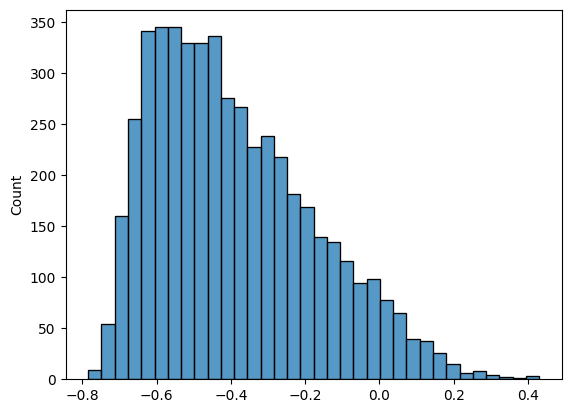

In [3]:
_, _, pc, _, _ = generate_chol_model(100, 0.1)
sns.histplot(pc[np.triu_indices_from(pc, k=1)])

In [4]:
_, _, pc, _, _ = generate_peng_model(100, 0.9)

<Axes: ylabel='Count'>

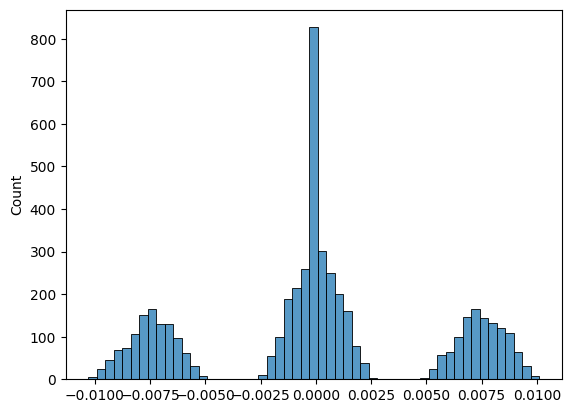

In [5]:
sns.histplot(pc[np.triu_indices_from(pc, k=1)])

In [6]:
N = 20
n = 100
delta = 0.1

In [7]:
precision = np.diag([delta for _ in range(N-1)], 1) + np.diag([delta for _ in range(N-1)], -1) + np.eye(N)
covariance = np.linalg.inv(precision)
pc = pcorr(precision)
ed = pcorr_to_edge_dict(pc)
G = edge_dict_to_graph(ed, N)

In [8]:
#precision, covariance, pc, ed, G = generate_chol_model(20, 0.94)

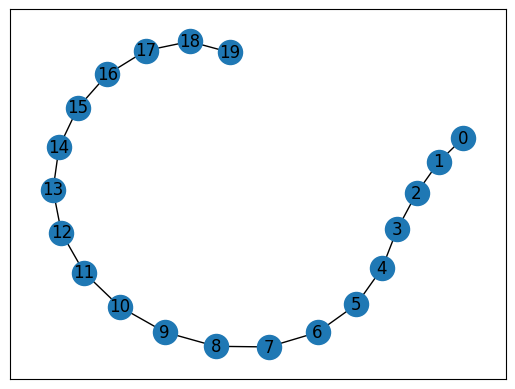

In [9]:
nx.draw_networkx(G)

In [2]:
S_obs = 2000
solvers = [SimInf(), Bonferroni(), Holm(), BenjaminiHochberg(), BenjaminiYekutieli()]

In [11]:
exp1 = perform_experiments_with_given_model(22, covariance, G, S_obs, solvers, [TP, FN, FP, FN, FDR, TPR, F1], ranger=range).T

In [12]:
exp2 = perform_experiments_with_given_model(100, covariance, G, S_obs, solvers, [TP, FN, FP, FN, FDR, TPR, F1], ranger=range).T

In [13]:
exp3 = perform_experiments_with_given_model(200, covariance, G, S_obs, solvers, [TP, FN, FP, FN, FDR, TPR, F1], ranger=range).T

In [14]:
exp1

,TP,FN,FP,FN,FDR,TPR,F1
SimInf,1.9825,17.0175,17.1550,17.0175,0.687810,0.104342,0.065889
Bonferroni,0.0055,18.9945,0.0475,18.9945,0.006033,0.000289,0.000294
Holm,0.0060,18.9940,0.0585,18.9940,0.006063,0.000316,0.000280
BenjaminiHochberg,0.3820,18.6180,3.3580,18.6180,0.031372,0.020105,0.005940
BenjaminiYekutieli,0.0660,18.9340,0.5870,18.9340,0.005387,0.003474,0.001024


In [15]:
exp2

,TP,FN,FP,FN,FDR,TPR,F1
SimInf,4.4345,14.5655,17.0110,14.5655,0.789751,0.233395,0.217707
Bonferroni,0.0770,18.9230,0.0850,18.9230,0.076458,0.004053,0.007629
Holm,0.0770,18.9230,0.0850,18.9230,0.076458,0.004053,0.007629
BenjaminiHochberg,0.1070,18.8930,0.1335,18.8930,0.084235,0.005632,0.010174
BenjaminiYekutieli,0.0240,18.9760,0.0160,18.9760,0.014083,0.001263,0.002379


In [16]:
exp3

,TP,FN,FP,FN,FDR,TPR,F1
SimInf,7.2975,11.7025,17.0905,11.7025,0.696170,0.384079,0.335667
Bonferroni,0.3140,18.6860,0.0800,18.6860,0.064083,0.016526,0.030779
Holm,0.3140,18.6860,0.0805,18.6860,0.064250,0.016526,0.030775
BenjaminiHochberg,0.4650,18.5350,0.1655,18.5350,0.079229,0.024474,0.043497
BenjaminiYekutieli,0.1000,18.9000,0.0160,18.9000,0.012458,0.005263,0.009867


In [8]:
given_density_experiment_parallel(40, 20, 0.95, 100, 200, solvers, [TP, FN, FP, FN, FDR, TPR, F1], generate_chol_model)

40 complete
40 complete
4040  complete
complete
40 complete
4040  completecomplete

40 complete
40 complete
40 complete
40 complete
40 complete
40 complete
40 complete
40 complete
40 complete


KeyboardInterrupt: 